## 2.1 Explanatory data analysis and Data cleaning
### Data Cleaning

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

Importing the dataset

In [3]:
df = pd.read_csv('../data/GEFCom2014Data/Wind/raw_data_incl_features.csv')
df.head()

,ZONEID,TIMESTAMP,TARGETVAR,U10,V10,U100,V100,HOUR,MONTH,WEEKDAY,IS_HOLIDAY,WS10,WS100,WD10,WD100,WD100CARD,WD10CARD,U100NORM,V100NORM
0,1,2012-01-01 01:00:00,0.000000,2.124600,-2.681966,2.864280,-3.666076,1,1,6,1,3.421530,4.652334,321.614439,321.999735,NW,NW,0.615665,-0.788008
1,1,2012-01-01 02:00:00,0.054879,2.521695,-1.796960,3.344859,-2.464761,2,1,6,1,3.096451,4.154892,305.473680,306.385781,NW,NW,0.805041,-0.593219
2,1,2012-01-01 03:00:00,0.110234,2.672210,-0.822516,3.508448,-1.214093,3,1,6,1,2.795932,3.712577,287.108562,289.088098,WNW,WNW,0.945017,-0.327022
3,1,2012-01-01 04:00:00,0.165116,2.457504,-0.143642,3.215233,-0.355546,4,1,6,1,2.461699,3.234831,273.345160,276.310236,W,W,0.993941,-0.109912
4,1,2012-01-01 05:00:00,0.156940,2.245898,0.389576,2.957678,0.332701,5,1,6,1,2.279435,2.976332,260.159324,263.581938,W,W,0.993733,0.111782


Inspecting tha data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175440 entries, 0 to 175439
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ZONEID      175440 non-null  int64  
 1   TIMESTAMP   175440 non-null  object 
 2   TARGETVAR   175265 non-null  float64
 3   U10         175440 non-null  float64
 4   V10         175440 non-null  float64
 5   U100        175440 non-null  float64
 6   V100        175440 non-null  float64
 7   HOUR        175440 non-null  int64  
 8   MONTH       175440 non-null  int64  
 9   WEEKDAY     175440 non-null  int64  
 10  IS_HOLIDAY  175440 non-null  int64  
 11  WS10        175440 non-null  float64
 12  WS100       175440 non-null  float64
 13  WD10        175440 non-null  float64
 14  WD100       175440 non-null  float64
 15  WD100CARD   175440 non-null  object 
 16  WD10CARD    175440 non-null  object 
 17  U100NORM    175440 non-null  float64
 18  V100NORM    175440 non-null  float64
dtypes:

In [5]:
df.isna().sum()

ZONEID          0
TIMESTAMP       0
TARGETVAR     175
U10             0
V10             0
U100            0
V100            0
HOUR            0
MONTH           0
WEEKDAY         0
IS_HOLIDAY      0
WS10            0
WS100           0
WD10            0
WD100           0
WD100CARD       0
WD10CARD        0
U100NORM        0
V100NORM        0
dtype: int64

The dataset has 175 NaNs, we linearly interpolate them.

In [6]:
df.interpolate(method='linear', inplace=True)

Creating dummy variables for ```WD100CARD ``` and  ```WD10CARD ```

In [7]:
df = pd.get_dummies(df, columns = ['WD100CARD','WD10CARD'], drop_first=True)

Saving the cleaned dataset in ```clean_data.csv```

In [8]:
# Save cleaned dataframe including to csv
df.to_csv('../data/GEFCom2014Data/Wind/clean_data.csv', index = False)

### EDA

View statistical properties of the target and the windspeeds / winddirections

In [22]:
df[['TARGETVAR', 'U10', 'V10', 'U100', 'V100', 'WS10', 'WS100']].describe().T

,count,mean,std,min,25%,50%,75%,max
TARGETVAR,175440.0,0.358542,0.310077,0.000000,0.080301,0.278589,0.602020,1.000000
U10,175440.0,0.818499,3.031781,-8.371644,-1.498648,0.548880,2.805379,14.837177
V10,175440.0,0.120835,3.105553,-12.923576,-2.116981,0.410020,2.364026,11.401396
U100,175440.0,1.272769,4.816235,-12.425352,-2.404248,1.053103,4.734727,21.399071
V100,175440.0,0.058513,5.096587,-19.791997,-3.768786,0.785671,4.091509,16.304799
WS10,175440.0,3.988859,1.899898,0.023234,2.486958,3.706721,5.162363,15.233722
WS100,175440.0,6.565405,2.773068,0.012818,4.657228,6.370377,8.216829,22.155522


The dateframe has ~175 K obersavtions in total, and ~17,5 K observations per windfarm. 
46 features and the target variable.

In [10]:
df.shape

(175440, 47)

In [11]:
for zone in df.ZONEID.unique():
    print("Windfarm {}: ".format(zone),df[df['ZONEID']==zone].shape)

Windfarm 1:  (17544, 47)
Windfarm 2:  (17544, 47)
Windfarm 3:  (17544, 47)
Windfarm 4:  (17544, 47)
Windfarm 5:  (17544, 47)
Windfarm 6:  (17544, 47)
Windfarm 7:  (17544, 47)
Windfarm 8:  (17544, 47)
Windfarm 9:  (17544, 47)
Windfarm 10:  (17544, 47)


### Distributions of Target and features

Distribution of the target ``` TARGETVAR```

In [12]:
sns.set_theme()

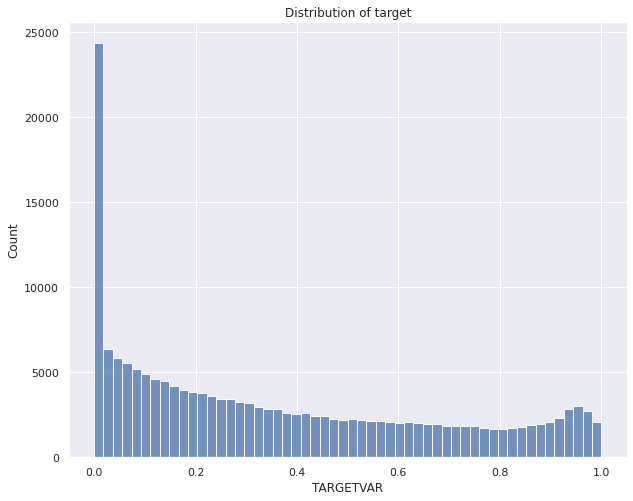

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
sns.histplot(data = df, x = df.TARGETVAR)
plt.title('Distribution of target');

In [14]:
print('min:', round(df.TARGETVAR.min(),2))
print('max:', round(df.TARGETVAR.max(),2))
print('mean:', round(df.TARGETVAR.mean(),2))


min: 0.0
max: 1.0
mean: 0.36


Distribution of the target on each windfarm

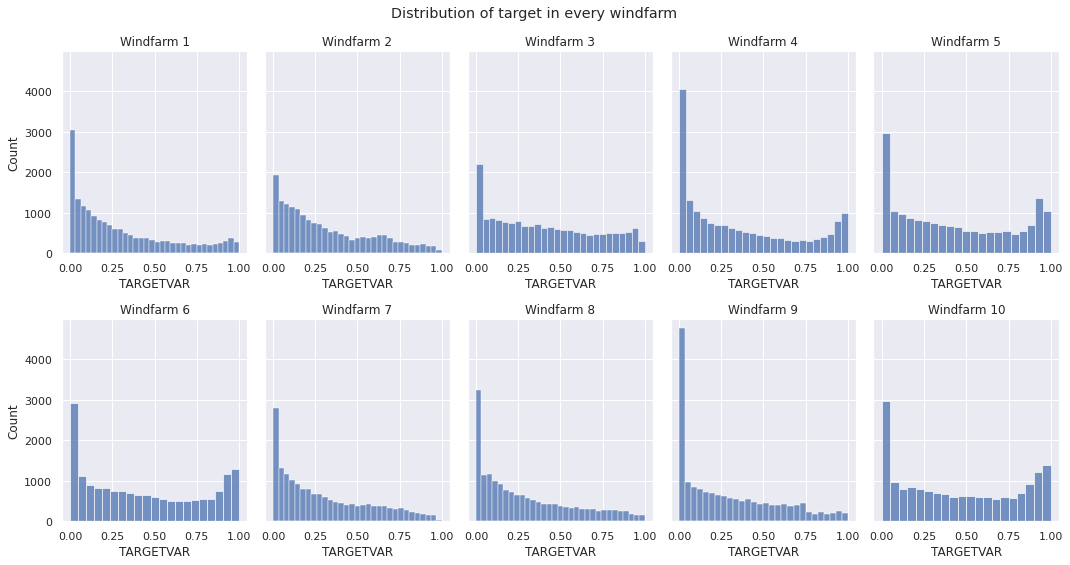

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharey=True, figsize=(15,8))
fig.suptitle('Distribution of target in every windfarm')
for zone in df.ZONEID.unique():
    plt.subplot(2,5,zone)   
    plt.title("Windfarm {}".format(zone))
    sns.histplot(data = df, x = df[df['ZONEID']==zone].TARGETVAR)
    
fig.tight_layout();

Distribution of the Windspeed  ``` WS100``` on 100m. The windspeed has values between 0 and 22 m/s.
The mean is 6,6 m/s.  

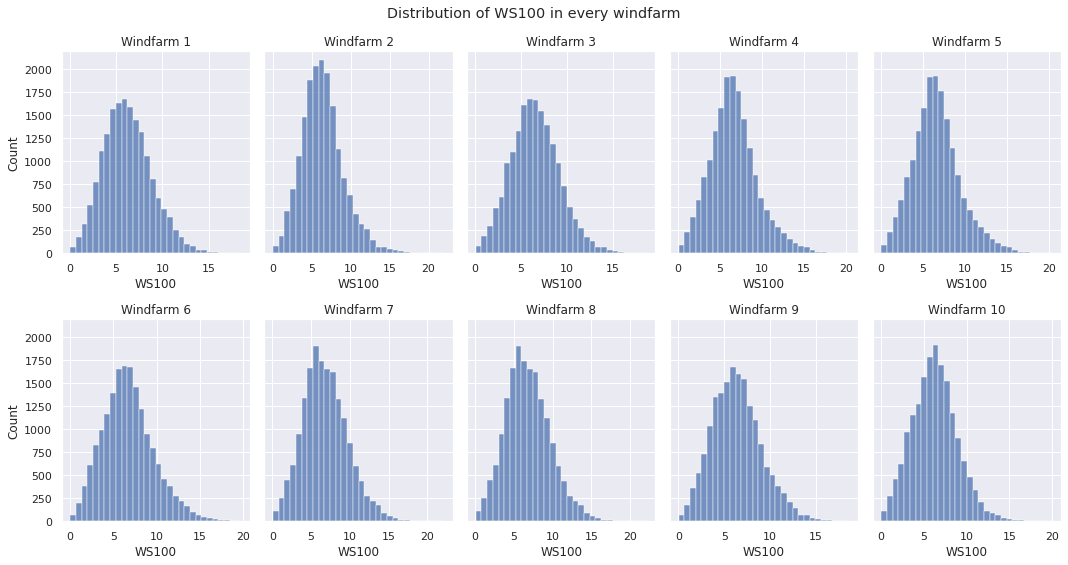

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharey=True,figsize=(15,8))
fig.suptitle('Distribution of WS100 in every windfarm')
for zone in df.ZONEID.unique():
    plt.subplot(2,5,zone)   
    plt.title("Windfarm {}".format(zone))
    sns.histplot(data = df, x = df[df['ZONEID']==zone].WS100, bins=30)
fig.tight_layout();   

In [17]:
print('min:', round(df.WS100.min(),2))
print('max:', round(df.WS100.max(),2))
print('mean:',round(df.WS100.mean(),2))

min: 0.01
max: 22.16
mean: 6.57


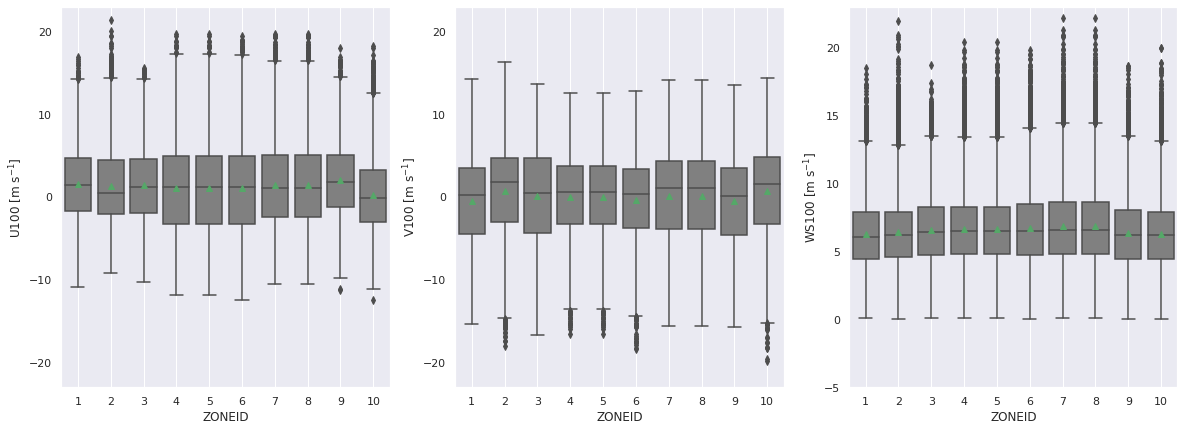

In [18]:
# distribution of zonal and meridional wind at the different sites
fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
ax = np.reshape(ax,3)

for i,var in enumerate(['U100','V100','WS100']): 
    sns.boxplot(data=df, x='ZONEID', y=var, color='gray', showmeans=True, ax=ax[i])
    ax[i].grid()
    if i < 2:
        ax[i].set_ylim([-23.,23.])
    else:
        ax[i].set_ylim([-5.,23.])
    ax[i].set_ylabel('{} {}'.format(var,"$\mathregular{[m\ s^{-1}]}$"))

Distribution of zonal wind at height 10 m ```U10```

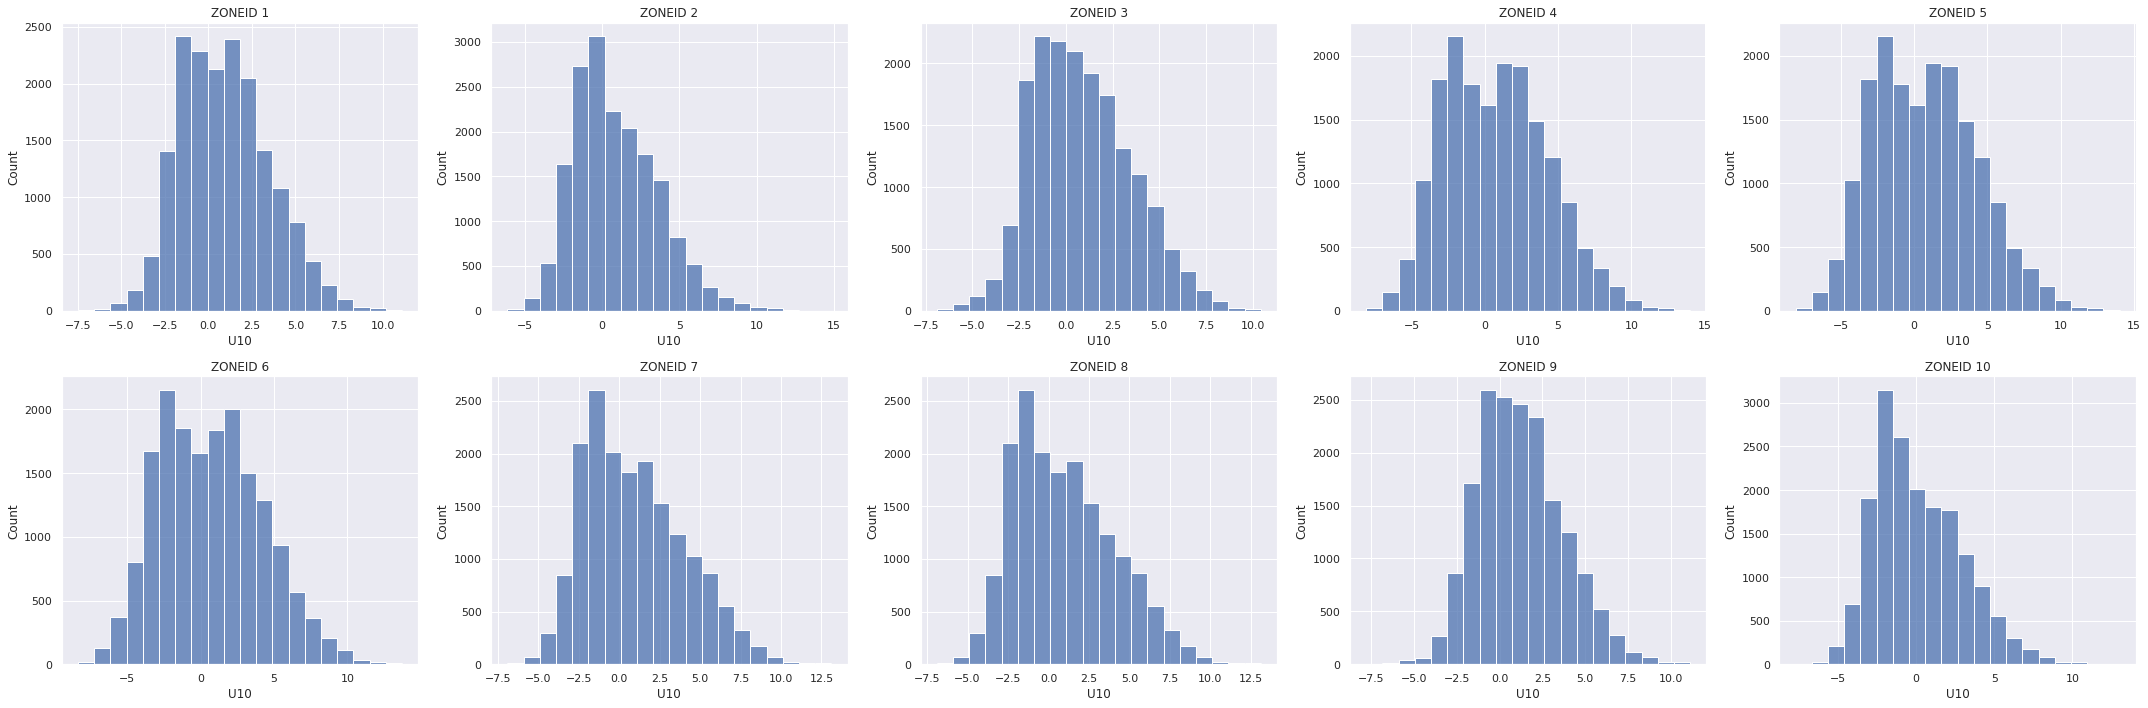

In [19]:
zones = df.ZONEID.unique()

fig, axs = plt.subplots(2,5,figsize = (30, 10))

axs = axs.ravel()

for zone in zones:
    sns.histplot(data = df[df['ZONEID'] == zone], x = 'U10', bins = 20, ax = axs[zone - 1])
    axs[zone - 1].set_title('ZONEID {}'.format(zone))

fig.tight_layout()


Distribution of zonal wind at height 100 m ```U100```

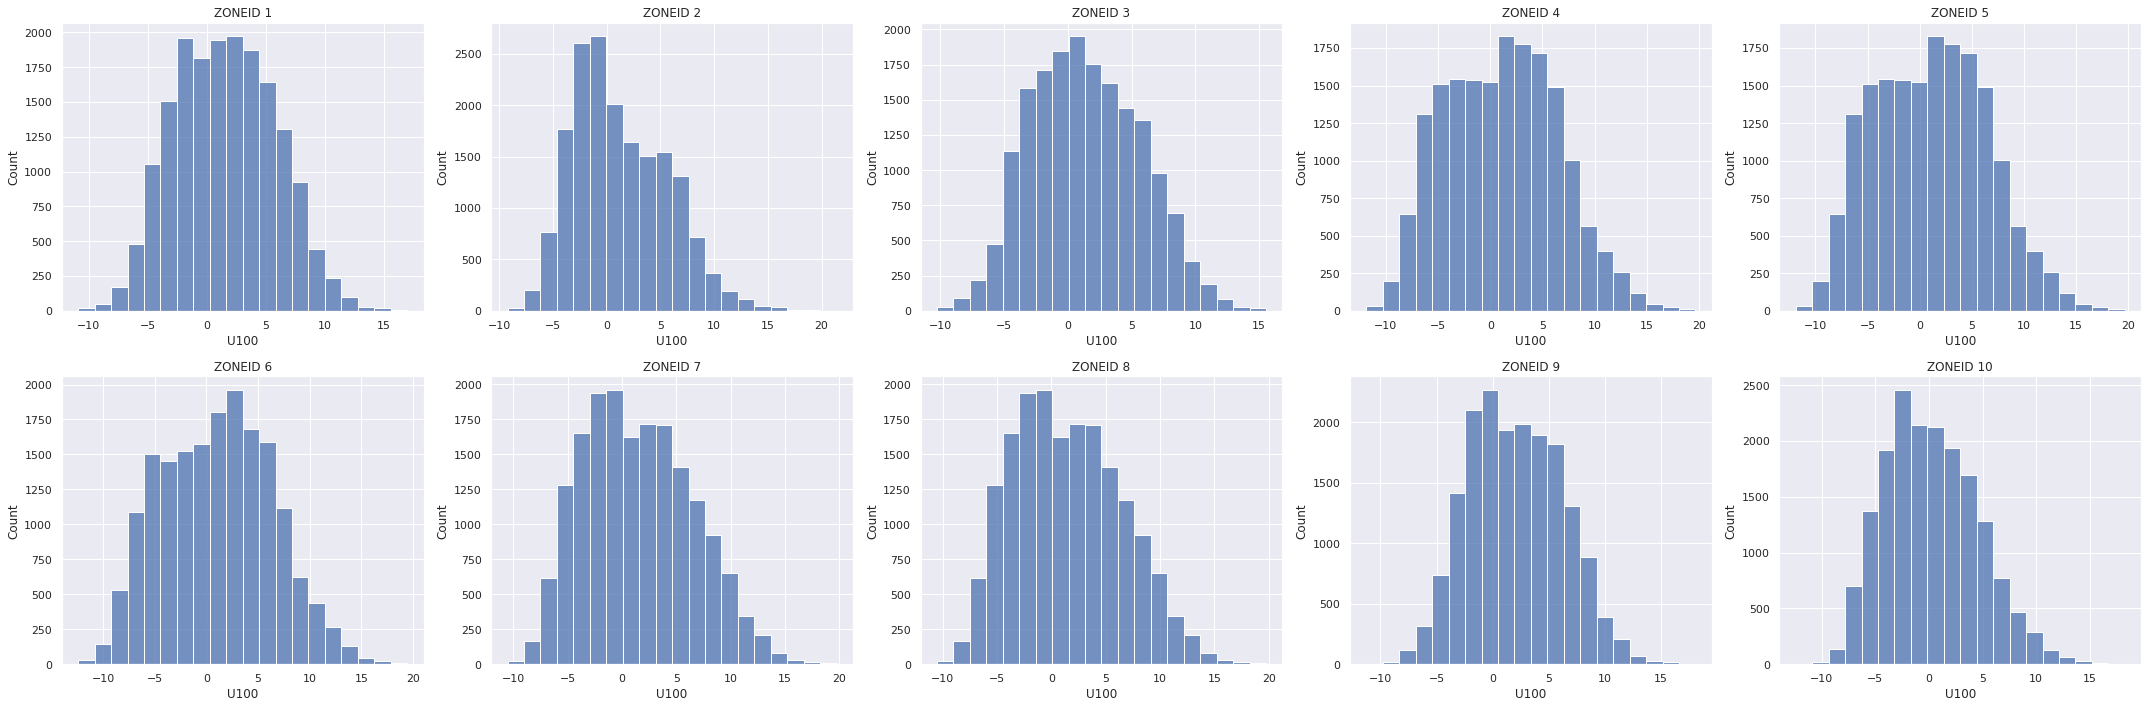

In [20]:
zones = df.ZONEID.unique()

fig, axs = plt.subplots(2,5,figsize = (30, 10))

axs = axs.ravel()

for zone in zones:
    sns.histplot(data = df[df['ZONEID'] == zone], x = 'U100', bins = 20, ax = axs[zone - 1])
    axs[zone - 1].set_title('ZONEID {}'.format(zone))

fig.tight_layout()


The windspeed is normal distributed, the winddirections is normal distributed in a few windfarms only.
The target variable is also not normal distributed and has many zero values. We will have analyse this in the next notebook.